In [3]:
import pandas as pd

In [4]:
World_Happiness = pd.read_csv("world-happiness-report-2021.csv")
World_Happiness

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.000,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.700,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.400,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.000,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.400,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,Lesotho,Sub-Saharan Africa,3.512,0.120,3.748,3.276,7.926,0.787,48.700,0.715,-0.131,0.915,2.43,0.451,0.731,0.007,0.405,0.103,0.015,1.800
145,Botswana,Sub-Saharan Africa,3.467,0.074,3.611,3.322,9.782,0.784,59.269,0.824,-0.246,0.801,2.43,1.099,0.724,0.340,0.539,0.027,0.088,0.648
146,Rwanda,Sub-Saharan Africa,3.415,0.068,3.548,3.282,7.676,0.552,61.400,0.897,0.061,0.167,2.43,0.364,0.202,0.407,0.627,0.227,0.493,1.095
147,Zimbabwe,Sub-Saharan Africa,3.145,0.058,3.259,3.030,7.943,0.750,56.201,0.677,-0.047,0.821,2.43,0.457,0.649,0.243,0.359,0.157,0.075,1.205


In [5]:
World_Happiness.shape

(149, 20)

In [6]:
World_Happiness.describe

<bound method NDFrame.describe of     Country name  Regional indicator  Ladder score  \
0        Finland      Western Europe         7.842   
1        Denmark      Western Europe         7.620   
2    Switzerland      Western Europe         7.571   
3        Iceland      Western Europe         7.554   
4    Netherlands      Western Europe         7.464   
..           ...                 ...           ...   
144      Lesotho  Sub-Saharan Africa         3.512   
145     Botswana  Sub-Saharan Africa         3.467   
146       Rwanda  Sub-Saharan Africa         3.415   
147     Zimbabwe  Sub-Saharan Africa         3.145   
148  Afghanistan          South Asia         2.523   

     Standard error of ladder score  upperwhisker  lowerwhisker  \
0                             0.032         7.904         7.780   
1                             0.035         7.687         7.552   
2                             0.036         7.643         7.500   
3                             0.059         7.670

In [7]:
Y = World_Happiness['Ladder score']
Y

0      7.842
1      7.620
2      7.571
3      7.554
4      7.464
       ...  
144    3.512
145    3.467
146    3.415
147    3.145
148    2.523
Name: Ladder score, Length: 149, dtype: float64

In [8]:
X = World_Happiness.drop(['Country name', 'Regional indicator', 'Ladder score', 'Ladder score in Dystopia', 'Explained by: Log GDP per capita', 'Explained by: Social support', 'Explained by: Healthy life expectancy', 'Explained by: Freedom to make life choices', 'Explained by: Generosity', 'Explained by: Perceptions of corruption', 'Standard error of ladder score', 'Dystopia + residual', 'upperwhisker', 'lowerwhisker'], axis = 1)
X

,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,10.775,0.954,72.000,0.949,-0.098,0.186
1,10.933,0.954,72.700,0.946,0.030,0.179
2,11.117,0.942,74.400,0.919,0.025,0.292
3,10.878,0.983,73.000,0.955,0.160,0.673
4,10.932,0.942,72.400,0.913,0.175,0.338
...,...,...,...,...,...,...
144,7.926,0.787,48.700,0.715,-0.131,0.915
145,9.782,0.784,59.269,0.824,-0.246,0.801
146,7.676,0.552,61.400,0.897,0.061,0.167
147,7.943,0.750,56.201,0.677,-0.047,0.821


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [11]:
X_train.shape, Y_train.shape

((119, 6), (119,))

In [12]:
X_test.shape, Y_test.shape

((30, 6), (30,))

In [13]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [14]:
model = linear_model.LinearRegression()

In [15]:
model.fit(X_train, Y_train)

LinearRegression()

In [16]:
Y_pred = model.predict(X_test)

In [17]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_test, Y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_test, Y_pred))

Coefficients: [ 0.2441408   3.29474352  0.02207433  1.90683321  0.10625584 -0.62678373]
Intercept: -1.9446631680414477
Mean squared error (MSE): 0.45
Coefficient of determination (R^2): 0.60


In [42]:
print(X.columns)

Index(['Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')


In [ ]:
# Ladder Score = .244(Logged GDP per capita) + 3.295(Social support) + .022(Healthy life expectancy) + 1.907(Freedom to make life choices) + .106(Generosity) - .627(Perceptions of corruption )

In [18]:
import seaborn as sns

In [19]:
Y_test

19     6.834
32     6.372
98     5.045
17     6.965
55     5.940
12     7.155
97     5.051
56     5.929
39     6.189
9      7.268
99     5.030
88     5.198
50     6.032
126    4.395
8      7.277
83     5.339
59     5.882
7      7.324
15     7.069
96     5.066
25     6.494
44     6.152
36     6.309
140    3.658
24     6.561
5      7.392
105    4.918
145    3.467
11     7.157
74     5.534
Name: Ladder score, dtype: float64

In [21]:
import numpy as np
np.array(Y_test)

array([6.834, 6.372, 5.045, 6.965, 5.94 , 7.155, 5.051, 5.929, 6.189,
       7.268, 5.03 , 5.198, 6.032, 4.395, 7.277, 5.339, 5.882, 7.324,
       7.069, 5.066, 6.494, 6.152, 6.309, 3.658, 6.561, 7.392, 4.918,
       3.467, 7.157, 5.534])

In [22]:
Y_pred

array([6.34834593, 5.55343965, 3.87414193, 6.38553979, 6.3067876 ,
       6.6667495 , 4.32933071, 6.0060577 , 6.62497742, 6.84765963,
       5.275781  , 6.13470206, 5.95380935, 5.28311793, 7.03140479,
       5.86020885, 5.99357109, 6.97701478, 6.23969759, 6.16725502,
       6.31171512, 6.27019347, 5.80596932, 4.53845936, 6.44458793,
       7.18626894, 4.48423481, 5.37796244, 6.41021186, 5.74888552])

<AxesSubplot:xlabel='Ladder score'>

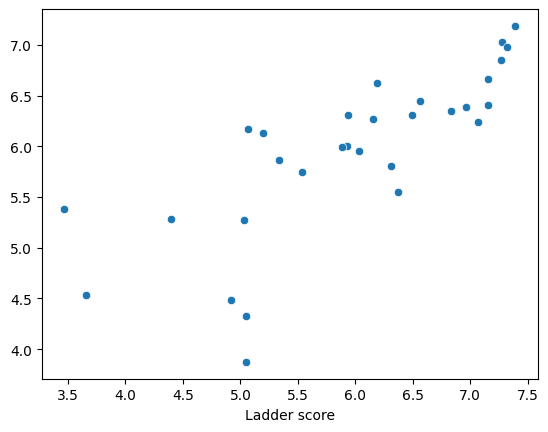

In [34]:
sns.scatterplot(x = Y_test, y = Y_pred)

<AxesSubplot:xlabel='Ladder score'>

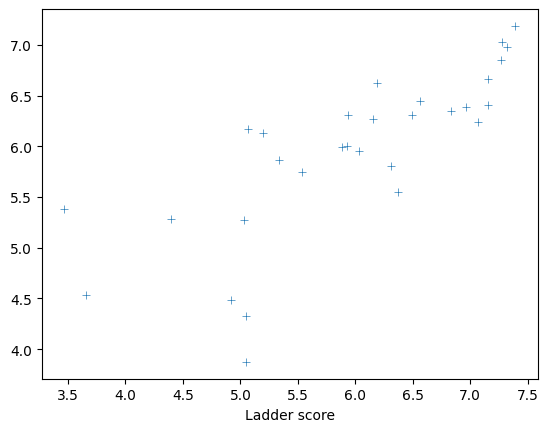

In [38]:
sns.scatterplot(x = Y_test, y = Y_pred, marker = "+")